<a href="https://colab.research.google.com/github/srilav/machinelearning/blob/main/M4_AST_11_Multiple_Stock_Trading_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 11: Multiple Stock Trading

## Learning Objectives

At the end of the experiment, you will be able to

* understand deep reinforcement learning
* design an automated trading solution for multiple stock trading
* backtest the trading results

## Dataset

The dataset we use in this experiment is **Dow 30 constituents stocks** which is a price-weighted measurement stock market index of 30 prominent companies listed on stock exchanges in the United States. Companies included in this dataset are Apple Inc. (AAPL), Boeing (BA), Goldman Sachs (GS), etc.

The data is obtained from Yahoo Finance API using YahooDownloader class. Yahoo Finance provides stock data, financial news, financial reports, etc for free. The data contains 46470 records and 8 columns including date,  Open, High, Low, Close stock price, volume, day, and tic (label of company stock).

To know more about Dow 30 dataset, click [here](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average#Components).

## Information

**Deep reinforcement learning (DRL)** is a subfield of machine learning that combines reinforcement learning (RL) and deep learning. RL considers the problem of a computational agent learning to make decisions by trial and error. Deep RL incorporates deep learning into the solution, allowing agents to make decisions from unstructured input data without manual engineering of the state space.

Suppose that we have a well trained DRL agent “DRL Trader”, we want to use it to **trade multiple stocks** in Dow 30 constituents portfolio:

* Assume at the end of the day we are at time t, we will know the open-high-low-close price of the Dow 30 constituents stocks. We can use these information to calculate technical indicators such as MACD, RSI, CCI, ADX. In Reinforcement Learning, we call these data or features as “states”.

* Portfolio value is given by 

$$V(t) =\ balance (t) + dollar\ amount\ of\ the\ stocks (t).$$

* We feed the states into our well trained DRL Trader, the trader will output a list of actions, the action for each stock is a value within $[-1, 1]$, we can treat this value as the trading signal, $1$ means a strong buy signal, $-1$ means a strong sell signal.

* We calculate $$k = actions *h\_max,$$ 

 where $h\_max$ is a predefined parameter that sets as the maximum amount of shares to trade. So we will have a list of shares to trade.

* The dollar amount of $shares = shares\ to\ trade*\ close\ price (t)$.

* Update balance and shares: These dollar amount of shares are the money we need to trade at time $t$.

$$Updated\ balance = balance(t)\ −\ amount\ of\ money\ we\ pay\ to\ buy\ shares\ +\ amount\ of\ money\ we\ receive\ to\ sell\ shares.$$ 

$$Updated\ shares\ =\ shares\ held(t) −\ shares\ to\ sell\ +\ shares\ to\ buy$$.

* So we take actions to trade based on the advice of our DRL Trader at the end of day at time $t$ (time $t$’s close price equals time $t+1$’s open price). We hope that we will benefit from these actions by the end of day at time $t+1$.

* Take a step to time $t+1$, at the end of day, we will know the close price at $t+1$, the 

$$dollar\ amount\ of\ the\ stocks(t+1)\ =\ sum(updated\ shares\ * close\ price (t+1)).$$ 

$$Portfolio\ value V(t+1)\ =\ balance(t+1)\ +\ dollar\ amount\ of\ the\ stocks (t+1).$$

* So the step reward by taking the actions from DRL Trader at time $t$ to $t+1$ is 
$$r = V(t+1) − V(t).$$ 

 The reward can be positive or negative in the training stage. But we need a positive reward in trading to say that our DRL Trader is effective.

* Repeat this process until termination.

In the below figure we have the logic chart of multiple stock trading and a made-up example for demonstration purpose.

<center>
<img src="https://miro.medium.com/max/1902/1*wa0y8XkfswFABFjrMF5cFA.jpeg"/ width=400px>
</center>

<center>
<img src="https://miro.medium.com/max/4098/1*gEmURZ0l7dgoj5p5N5wfLQ.png"/ width=900px>
</center>

Multiple stock trading is different from single stock trading because as the number of stocks increases, the dimension of the data will increase, the state and action space in reinforcement learning will grow exponentially. So stability and reproducibility are very essential here.

We use a DRL library `FinRL` that facilitates us in quantitative finance and to develop our own stock trading strategies.

`FinRL` is characterized by its reproducibility, scalability, simplicity, applicability and extendibility.

### Problem Statement 

Design an automated trading solution for multiple stock trading.

Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a Markov Decision Process (MDP) problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

The components of the reinforcement learning environment are:

<center>
<img src="https://www.kdnuggets.com/images/reinforcement-learning-fig1-700.jpg" width=500px/>
</center>

* **Action:** The action space describes the allowed actions that the agent interacts with the environment. Normally, an action includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. When an action is carried upon multiple shares, we use an action space $\{−k, …, −1, 0, 1, …, k\}$, where $k$ denotes the number of shares to buy and $-k$ denotes the number of shares to sell. For 30 stocks the entire action space is $(2k+1)^{30}$, here we use $k ≤ h\_max = 100$, so the entire action space is around $10^{60}$. It means we can sample a maximum of $10^{60}$ pairs of state and action combinations.

* **State:** {balance, close price, shares, MACD, RSI, CCI, ADX}, 181-dimensional vector (30 stocks * 6 + 1)

* **Reward function:** r(s, a, s′) = v′ − v, where v′ and v represent the portfolio values at state s′ and s, respectively

* **Environment:** multiple stock trading for Dow 30 constituents.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2200183" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "7671846954" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M4_AST_11_Multiple_Stock_Trading_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    ipython.magic("sx pip -qq install git+https://github.com/AI4Finance-LLC/FinRL-Library.git")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/MiniProjects/dow_30_dataset.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import required packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
import warnings
warnings.filterwarnings("ignore")
import datetime
import os
from finrl import config
from finrl import config_tickers
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.finrl_meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
import sys
sys.path.append("../FinRL-Library")

### Download Data

In [5]:
# List of stock tickers
print(config_tickers.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [6]:
# Load dataset
data_df = pd.read_csv("dow_30_dataset.csv")
data_df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,3.067143,3.251429,3.041429,2.782837,746015200,AAPL,4
1,2009-01-02,18.570000,19.520000,18.400000,15.657365,10955700,AXP,4
2,2009-01-02,42.799999,45.560001,42.779999,33.941101,7010200,BA,4
3,2009-01-02,44.910000,46.980000,44.709999,32.655109,7117200,CAT,4
4,2009-01-02,16.410000,17.000000,16.250000,12.505757,40980600,CSCO,4


In [7]:
data_df.shape

(46470, 8)

### Preprocess Data

FinRL uses a `FeatureEngineer` class to preprocess data.

Some of the technical indicators used in the analysis of financial markets include relative strength index (RSI), moving average convergence divergence (MACD), commodity channel index (CCI), and directional index (DX).

In [8]:
tech_indicator_list = config.INDICATORS
print(tech_indicator_list)

['macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma']


In [9]:
# Perform Feature Engineering

fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = tech_indicator_list,
                    use_turbulence=False,
                    user_defined_feature = False)

data_df = fe.preprocess_data(data_df)
data_df.head()

Successfully added technical indicators


,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2009-01-02,3.067143,3.251429,3.041429,2.782837,746015200,AAPL,4,0.0,3.007655,2.675465,100.0,66.666667,100.0,2.782837,2.782837
1549,2009-01-02,18.570000,19.520000,18.400000,15.657365,10955700,AXP,4,0.0,3.007655,2.675465,100.0,66.666667,100.0,15.657365,15.657365
3098,2009-01-02,42.799999,45.560001,42.779999,33.941101,7010200,BA,4,0.0,3.007655,2.675465,100.0,66.666667,100.0,33.941101,33.941101
4647,2009-01-02,44.910000,46.980000,44.709999,32.655109,7117200,CAT,4,0.0,3.007655,2.675465,100.0,66.666667,100.0,32.655109,32.655109
6196,2009-01-02,16.410000,17.000000,16.250000,12.505757,40980600,CSCO,4,0.0,3.007655,2.675465,100.0,66.666667,100.0,12.505757,12.505757


### Train & Trade Data Split

In real life trading, the model needs to be updated periodically using rolling windows. Here, we just slice the data once into the train and trade set.

In [10]:
# Train and trade data
train = data_split(data_df, start = '2009-01-01', end = '2014-01-01')
trade = data_split(data_df, start = '2014-01-01', end = '2015-03-01')
# Check the length of the two datasets
print(len(train))
print(len(trade))

37740
8730


### Build Environment

In [11]:
# Compute State Space and Action Space
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(config.INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [12]:
# New
buy_cost_list = [0.001] * stock_dimension
sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

# Initialize an environment class
env_kwargs = {
    "hmax": 100,                                                # max number of share purchases allowed per asset
    "initial_amount": 1000000,                                  # amount of cash initially available
    "buy_cost_pct": buy_cost_list,                              # cost for buying shares
    "sell_cost_pct": sell_cost_list,                            # cost for selling shares
    "state_space": state_space,                                 # contains all of the environment’s data to be observed by the agent
    "stock_dim": stock_dimension,
    "num_stock_shares": num_stock_shares, 
    "tech_indicator_list": config.INDICATORS, 
    "action_space": stock_dimension,                            # contain all of the actions possible for an agent to take in the environment
    "reward_scaling": 1e-4 }                                    # scaling value to multiply reward by at each step

e_train_gym = StockTradingEnv(df = train, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


Here , the action space is just the number of unique stocks i.e, 30 and the state space is 181.

### Implement DRL Algorithms

`FinRL` library includes fine-tuned standard DRL algorithms, such as DQN, DDPG, PPO, SAC, A2C and TD3. It also allows users to design their own DRL algorithms by adapting these DRL algorithms. We use Soft Actor-Critic (SAC) for multiple stock trading because it is one of the most recent state-of-art algorithms. SAC is featured by its stability.

In [13]:
# Train SAC Model
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 200,
    "ent_coef": "auto_0.1"
}
model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=30000)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 200, 'ent_coef': 'auto_0.1'}
Using cuda device
-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 61         |
|    time_elapsed    | 81         |
|    total_timesteps | 5032       |
| train/             |            |
|    actor_loss      | 777        |
|    critic_loss     | 119        |
|    ent_coef        | 0.15       |
|    ent_coef_loss   | 219        |
|    learning_rate   | 0.0001     |
|    n_updates       | 4831       |
|    reward          | 0.60416716 |
-----------------------------------
-----------------------------------
| time/              |            |
|    episodes        | 8          |
|    fps             | 61         |
|    time_elapsed    | 164        |
|    total_timesteps | 10064      |
| train/             |            |
|    actor_loss      | 700        |
|    critic_loss     | 206        |
| 

### Trading

Assume that we have $1,000,000 initial capital on 2014/01/01. We use the SAC model to trade the Dow 30 stocks.

In [14]:
# Trade data
trade.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2014-01-02,19.845715,19.893929,19.715000,17.542171,234684800,AAPL,3,0.177402,18.182699,17.300580,55.908462,13.180694,4.334659,17.485826,16.868502
0,2014-01-02,90.900002,91.080002,89.379997,79.681335,5112000,AXP,3,1.565994,81.239383,72.907713,65.614327,159.748907,58.625628,76.427874,73.865362
0,2014-01-02,136.009995,137.250000,135.509995,116.807953,3366700,BA,3,1.048364,118.521243,112.457996,59.770180,74.599975,8.684766,115.203730,111.986887
0,2014-01-02,90.410004,90.449997,89.330002,71.539368,4898000,CAT,3,1.303843,73.763403,66.073124,60.574507,99.194840,32.808306,68.834733,68.070040
0,2014-01-02,22.170000,22.290001,21.910000,17.358772,44377000,CSCO,3,0.097985,17.619233,15.756757,51.100619,169.125238,10.690951,16.683192,17.262026


In [15]:
# Create trading env
e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)

# Make prediction and get the account value change
df_account_value, df_actions = DRLAgent.DRL_prediction(model = trained_sac, environment = e_trade_gym)

hit end!


In [16]:
df_account_value.head()

,date,account_value
0,2014-01-02,1.000000e+06
1,2014-01-03,1.000085e+06
2,2014-01-06,9.996784e+05
3,2014-01-07,1.001311e+06
4,2014-01-08,9.998980e+05


### Backtesting Performance

Backtesting plays a key role in evaluating the performance of a trading strategy. Backtesting assesses the viability of a trading strategy by discovering how it would perform on historical data. If backtesting works, traders and analysts may have increased confidence to employ it going forward. Automated backtesting tool is preferred because it reduces human error.

`FinRL` uses a set of functions to do the backtesting with [Quantopian pyfolio](https://github.com/quantopian/pyfolio) package. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

In [17]:
# BackTestStats
perf_stats_all = backtest_stats(account_value = df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

Annual return          0.097809
Cumulative returns     0.113778
Annual volatility      0.121219
Sharpe ratio           0.833026
Calmar ratio           1.315946
Stability              0.734988
Max drawdown          -0.074326
Omega ratio            1.151894
Sortino ratio          1.204849
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.843372
Daily value at risk   -0.014871
dtype: float64


The above table shows the statistics for backtesting performance.

In [18]:
# Baseline stats
baseline_df = get_baseline(ticker = '^DJI',
                            start = '2014-01-01',
                            end = '2015-03-01')
stats = backtest_stats(baseline_df, value_col_name = 'close')

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (291, 8)
Annual return          0.088493
Cumulative returns     0.102872
Annual volatility      0.114095
Sharpe ratio           0.802774
Calmar ratio           1.263127
Stability              0.771205
Max drawdown          -0.070059
Omega ratio            1.147383
Sortino ratio          1.142332
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.955314
Daily value at risk   -0.014011
dtype: float64


The above table shows the statistics for Dow Jones Industrial Average (DJIA) performance.

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (291, 8)


Start date,2014-01-02
End date,2015-02-27
Total months,13
,Backtest
Annual return,9.781%
Cumulative returns,11.378%
Annual volatility,12.122%
Sharpe ratio,0.83
Calmar ratio,1.32
Stability,0.73
Max drawdown,-7.433%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7.43,2014-09-19,2014-10-15,2014-11-14,41
1,6.50,2014-12-05,2014-12-16,2015-02-24,58
2,5.78,2014-01-07,2014-02-03,2014-02-28,39
3,4.72,2014-07-24,2014-08-07,2014-09-05,32
4,3.07,2014-04-02,2014-04-11,2014-05-12,29


Stress Events,mean,min,max
Apr14,-0.00%,-1.76%,1.15%
Oct14,-0.01%,-2.20%,1.84%
New Normal,0.04%,-2.20%,2.84%


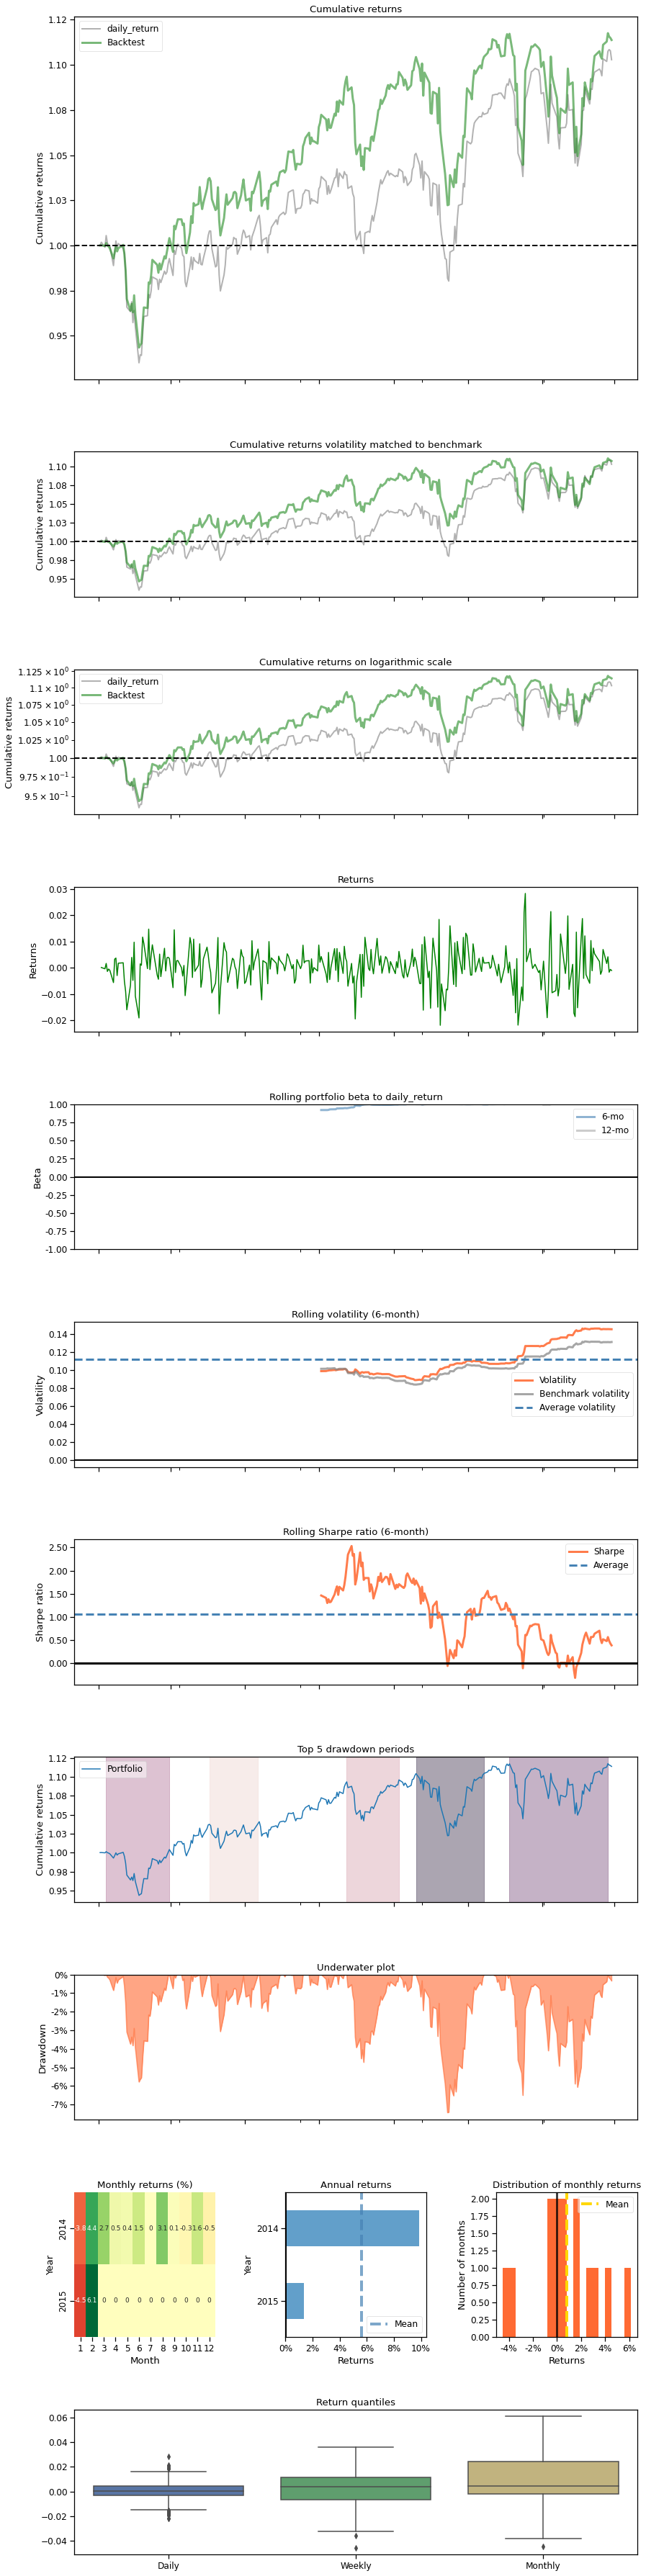

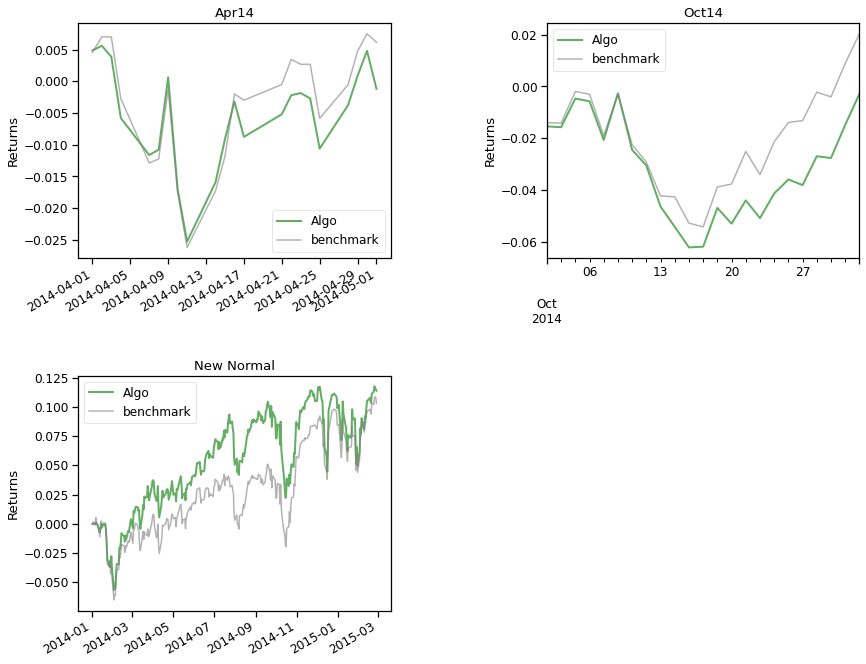

In [19]:
# BackTestPlot
%matplotlib inline
backtest_plot(account_value = df_account_value,     # pass the account value memory into the backtest functions
              baseline_ticker = '^DJI',             # select a baseline ticker Dow Jones Index: ^DJI, S&P 500: ^GSPC, NASDAQ 100: ^NDX
              baseline_start = '2014-01-01', 
              baseline_end = '2015-03-01')

In the above results, we can see 

* the statistics of the backtest along with drawdown period information

 A drawdown is a peak-to-valley decline during a specific period for an investment, trading account, or fund. A drawdown is usually quoted as the percentage between the peak and the subsequent valley. If a trading account has 10,000 in it, and the funds drop to 9,000 before moving back above 10,000, then the trading account witnessed a 10% drawdown. 
 
 To know more about drawdown, click [here](https://www.investopedia.com/terms/d/drawdown.asp).

* cumulative returns for daily return and backtest

* cumulative returns volatility matched to benchmark

* cumulative returns on logarithmic scale

* top 5 drawdown periods

* drawdown underwater plot

 Drawdowns are positive values. By simply reflecting the drawdowns across the x-axis we can turn this into an underwater plot as shown in the figure below.

 <center>
<img src="https://www.researchgate.net/profile/Edwin-Fischer-2/publication/228828261/figure/fig2/AS:667775940964357@1536221599397/Maximum-Drawdown-and-Time-under-Water.png" width=650px/>
</center>

* daily, weekly, and monthly return quantiles

### Please answer the questions below to complete the experiment:




In [20]:
#@title Select the correct statement w.r.t. the advantages of using Deep Reinforcement Learning (DRL) for automated stock trading: { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "All the above" #@param ["", "The goal of stock trading is to maximize returns while avoiding risks. DRL solves this optimization problem by maximizing the expected total reward from future actions over a time period", "DRL uses a reward function to optimize future rewards, in contrast to an ML regression/classification model that predicts the probability of future outcomes", "In contrast to Q-learning, that fails to handle large space, DRL is an efficient function approximator that can handle extremely large state space space and action space", "All the above", "None of the above"]

In [21]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [22]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}


In [24]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [23]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [25]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [26]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 8275
Date of submission:  10 Apr 2022
Time of submission:  22:02:17
View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions
